# Introduction
The aim of the project is to identify venues in Mumbai, India based on their rating and average prices. In this notebook, we will identify various venues in the city of Chandigarh, India, using Foursquare API and Zomato API, to help visitors select the restaurants that suit them the best.
Whenever a user is visiting a city they start looking for places to visit during their stay. They primarily look for places based on the venue ratings across all venues and the average prices such that the locations fits in their budget.
Here, we'll identify places that are fit for various individuals based on the information collected from the two APIs and Data Science. Once we have the plot with the venues, any company can launch an application using the same data and suggest users such information.

# Data Collection from APIs 
To begin with, we will take a look at Mumbai on the Map using the folium library.
We will also fetch the data from two different APIs.
Foursquare API: We will use the Foursquare API to fetch venues in Mumbai starting from the middle upto 44 Kilometers in each direction.
Zomato API: The Zomato API provides information about various venues including the complete address, user ratings, price for two people, price range and a lot more.


In [135]:
CHD_LATITUDE = 19.076
CHD_LONGITUDE = 72.877
print('The geograpical coordinates of Mumbai are {}, {}.'.format(CHD_LATITUDE, CHD_LONGITUDE))

The geograpical coordinates of Mumbai are 19.076, 72.877.


In [7]:
import folium

chandigarh_map = folium.Map(location = [CHD_LATITUDE, CHD_LONGITUDE], zoom_start = 13)
folium.Marker([CHD_LATITUDE, CHD_LONGITUDE]).add_to(chandigarh_map)

Mumbai_map

In [8]:

RADIUS = 4000 # 4 Km
NO_OF_VENUES = 100

#set credintials
FOURSQUARE_CLIENT_ID = 'IPTYUZQHVW5OCDTT331BXA1SFQCJ3QCNQ2NVFZHQI5M4ZJLY' # your Foursquare ID
FOURSQUARE_CLIENT_SECRET = '4ARF5SHATZIHJ2FJURJBFIUBZWYKR0UZ4FP5XHAGRE4BCZJ1' # your Foursquare Secret
VERSION = '20200424' # Foursquare API version

In [9]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

## using foursquare api

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize
import requests

pd.set_option('display.max_rows', None)

offset = 0
total_venues = 0
foursquare_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])

while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}').format(FOURSQUARE_CLIENT_ID, 
                                                                        FOURSQUARE_CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        CHD_LATITUDE, 
                                                                        CHD_LONGITUDE, 
                                                                        RADIUS,
                                                                        NO_OF_VENUES,
                                                                        offset)
    result = requests.get(url).json()
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    print("Total {} venues fetched within a total radius of {} Km".format(venues_fetched, RADIUS/1000))

    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)

    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]

    # Filter the category for each row
    venues['venue.categories'] = venues.apply(get_category_type, axis = 1)

    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    foursquare_venues = pd.concat([foursquare_venues, venues], axis = 0, sort = False)
    
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100

foursquare_venues = foursquare_venues.reset_index(drop = True)
print("\nTotal {} venues fetched".format(total_venues))

Total 100 venues fetched within a total radius of 4.0 Km


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total 100 venues fetched within a total radius of 4.0 Km
Total 31 venues fetched within a total radius of 4.0 Km

Total 231 venues fetched


### using zomato Api

In [57]:
headers = {'user-key': '57c7bf3391e8f795ff01b534595a1fc4'}
venues_information = []

for index, row in foursquare_venues.iterrows():
    print("Fetching data for venue: {}".format(index + 1))
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['name'], row['lat'], row['lng'])
    result = requests.get(url, headers = headers).json()
    if (len(result['restaurants']) > 0):
        venue.append(result['restaurants'][0]['restaurant']['name'])
        venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
        venue.append(result['restaurants'][0]['restaurant']['price_range'])
        venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
        venue.append(result['restaurants'][0]['restaurant']['location']['address'])
        venues_information.append(venue)
    else:
        venues_information.append(np.zeros(6))
    
zomato_venues = pd.DataFrame(venues_information, 
                                  columns = ['venue', 'latitude', 
                                             'longitude', 'price_for_two', 
                                             'price_range', 'rating', 'address'])

Fetching data for venue: 1
Fetching data for venue: 2
Fetching data for venue: 3
Fetching data for venue: 4
Fetching data for venue: 5
Fetching data for venue: 6
Fetching data for venue: 7
Fetching data for venue: 8
Fetching data for venue: 9
Fetching data for venue: 10
Fetching data for venue: 11
Fetching data for venue: 12
Fetching data for venue: 13
Fetching data for venue: 14
Fetching data for venue: 15
Fetching data for venue: 16
Fetching data for venue: 17
Fetching data for venue: 18
Fetching data for venue: 19
Fetching data for venue: 20
Fetching data for venue: 21
Fetching data for venue: 22
Fetching data for venue: 23
Fetching data for venue: 24
Fetching data for venue: 25
Fetching data for venue: 26
Fetching data for venue: 27
Fetching data for venue: 28
Fetching data for venue: 29
Fetching data for venue: 30
Fetching data for venue: 31
Fetching data for venue: 32
Fetching data for venue: 33
Fetching data for venue: 34
Fetching data for venue: 35
Fetching data for venue: 36
F

In [24]:
Mumbai_map = folium.Map(location = [CHD_LATITUDE, CHD_LONGITUDE], zoom_start = 13)
for name, latitude, longitude in zip(foursquare_venues['name'], foursquare_venues['lat'], foursquare_venues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Mumbai_map) 
     

Mumbai_map

In [58]:

zomato_venu2=zomato_venues.astype({'latitude': 'float64','longitude':'float64'})

In [65]:
Mumbai_map = folium.Map(location = [CHD_LATITUDE, CHD_LONGITUDE], zoom_start = 13)

for venue, address, latitude, longitude in zip(zomato_venu2['venue'], zomato_venu2['address'], 
                                               zomato_venu2['latitude'], zomato_venu2['longitude']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#cc3535',
        fill_opacity = 0.7,
        parse_html = False).add_to(Mumbai_map)  

Mumbai_map

In [76]:
foursquare_venues['lat'] = foursquare_venues['lat'].apply(lambda lat: round(float(lat), 4))
foursquare_venues['lng'] = foursquare_venues['lng'].apply(lambda lng: round(float(lng), 4))
zomato_venues['latitude'] = zomato_venues['latitude'].apply(lambda lat: round(float(lat), 4))
zomato_venues['longitude'] = zomato_venues['longitude'].apply(lambda lng: round(float(lng), 4))

In [77]:
dataset = pd.concat([foursquare_venues, zomato_venues], axis = 1)
dataset['lat_diff'] = dataset['latitude'] - dataset['lat']
dataset['lng_diff'] = dataset['longitude'] - dataset['lng']

##### I'll drop the venues which have 0.0 rating as it means it's not been rated yet.

In [78]:
selected_venues = dataset[(abs(dataset['lat_diff']) <= 0.0004) & (abs(dataset['lng_diff']) <= 0.0004)].reset_index(drop = True)
selected_venues

,name,categories,lat,lng,venue,latitude,longitude,price_for_two,price_range,rating,address,lat_diff,lng_diff
0,Sofitel Mumbai BKC,Hotel,19.0674,72.8690,Tuskers - Sofitel,19.0673,72.8692,3300.0,4.0,4.0,"Sofitel Hotel, C 57, Bandra Kurla Complex, Mumbai",-0.0001,0.0002
1,Trident,Hotel,19.0668,72.8675,O22 - Trident,19.0672,72.8675,4000.0,4.0,4.0,"Trident Hotel, C 56, G Block, Bandra Kurla Com...",0.0004,0.0000
2,Masala Library,Indian Restaurant,19.0689,72.8697,Masala Library,19.0690,72.8696,5000.0,4.0,4.4,"Ground Floor, First International Financial Ce...",0.0001,-0.0001
3,Natural's Ice Cream,Ice Cream Shop,19.0776,72.8630,Natural Ice Cream,19.0776,72.8628,300.0,1.0,4.1,"3, Gokul Harmony, Kalina Market, Sunder Nagar,...",0.0000,-0.0002
4,Smoke House Deli (BKC),Deli / Bodega,19.0688,72.8697,Smoke House Deli,19.0688,72.8695,2500.0,4.0,4.3,"3A, Ground Floor, 1st International Financial ...",0.0000,-0.0002
5,Theobrama,Dessert Shop,19.0635,72.8617,Theobroma,19.0637,72.8621,900.0,2.0,4.2,"The Capital, Ground Floor, Bandra Kurla Comple...",0.0002,0.0004
6,Delhi Zaika,Indian Restaurant,19.0771,72.8783,Delhi Zaika,19.0770,72.8784,700.0,2.0,3.8,"5/6, Near Kamran Kalpana Theater, LBS Marg, Ku...",-0.0001,0.0001
7,SodaBottleOpenerWala,Irani Cafe,19.0636,72.8624,SodaBottleOpenerWala,19.0638,72.8620,1500.0,3.0,4.1,"Ground Floor, The Capital Building, G Block, B...",0.0002,-0.0004
8,Starbucks,Coffee Shop,19.0866,72.8898,Starbucks Coffee,19.0865,72.8898,700.0,2.0,4.1,"First Floor, Phoenix Market City, LBS Marg, Ku...",-0.0001,0.0000
9,Naaz Hotel,Indian Restaurant,19.0848,72.8892,Naaz Hotel,19.0846,72.8893,700.0,2.0,4.1,"Kantharia Mahal, LBS Road, Opposite Phoenix Ma...",-0.0002,0.0001


######  Category 1: There are venues that have specific restaurants/cafes inside them as provided by Zomato API (Pizza Hut in Elante Mall).
###### Category 2: Two locations are so close by that they have practically same latitude and longitude values (The Pizza Kitchen and Zara).
###### Category 3: Some have been replaced with new restaurants (Uderdoggs has now been replaced by The Brew Estate).
###### The venues which belong to category 1 and category 3 are alright to keep, the venues that fall in category 2 should be removed.

In [79]:
selected_venues = selected_venues.drop([12,14,15,16,17,22,24,26,34,43,44,48,58,66,70,72,92]).reset_index(drop = True)

##### I'll now select the venue name from Zomato API. I'll also get the average price per person by dividing the column price_for_two by 2 and removing this column from the dataset along with other unnecessary columns.

In [80]:
selected_venues['average_price'] = selected_venues['price_for_two']/2
selected_venues = selected_venues.drop(columns = ['name', 'lat', 'lng', 'lat_diff', 'lng_diff', 'price_for_two'])

In [81]:
selected_venues.head(5)

,categories,venue,latitude,longitude,price_range,rating,address,average_price
0,Hotel,Tuskers - Sofitel,19.0673,72.8692,4.0,4.0,"Sofitel Hotel, C 57, Bandra Kurla Complex, Mumbai",1650.0
1,Hotel,O22 - Trident,19.0672,72.8675,4.0,4.0,"Trident Hotel, C 56, G Block, Bandra Kurla Com...",2000.0
2,Indian Restaurant,Masala Library,19.0690,72.8696,4.0,4.4,"Ground Floor, First International Financial Ce...",2500.0
3,Ice Cream Shop,Natural Ice Cream,19.0776,72.8628,1.0,4.1,"3, Gokul Harmony, Kalina Market, Sunder Nagar,...",150.0
4,Deli / Bodega,Smoke House Deli,19.0688,72.8695,4.0,4.3,"3A, Ground Floor, 1st International Financial ...",1250.0



##### I'll drop the venues which have 0.0 rating as it means it's not been rated yet.

In [82]:
selected_venues = selected_venues[selected_venues['rating'] != 0.0]
print("Total venues available: {}".format(selected_venues.shape[0]))

Total venues available: 70


### methodology

##### This project aims at identifying the venues in Chandigarh based on their rating and average costs. This would enable any visitor to identify the venues he/she wants to visit based on their rating and cost preference.
##### As a first step, we retrieved the data from two APIs (Foursquare and Zomato). We extract venue information from the center of Mumbai, upto a distance of 4 Km. The latitude and longitude values are then used to fetch venue rating and price from Zomato.
##### Secondly, we then explored the data retrieved from the two APIs on the map and identified the top category types. The data from the two sources is carefully combined based on the name, latitude and longitude values from the two sources. The final dataset would include the rating and price values for each venue.
##### Next, we'll analyse the data that we created based on the ratings and price of each venue. We'll identify places where many venues are located so that any visitor can go to one place and enjoy the option to choose amongst many venue options. We'll also explore areas that are high rated and those that are low rated while also plotting the map of high and low priced venues. Lastly, we'll cluster the venues based on the available information of each venue. This will allow us to clearly identify which venues can be recommended and with what characteristics.
##### Finally, we'll discuss and conclude which venues to be explored based on visitor requirement of rating and cost.

# Analysis

<BarContainer object of 28 artists>

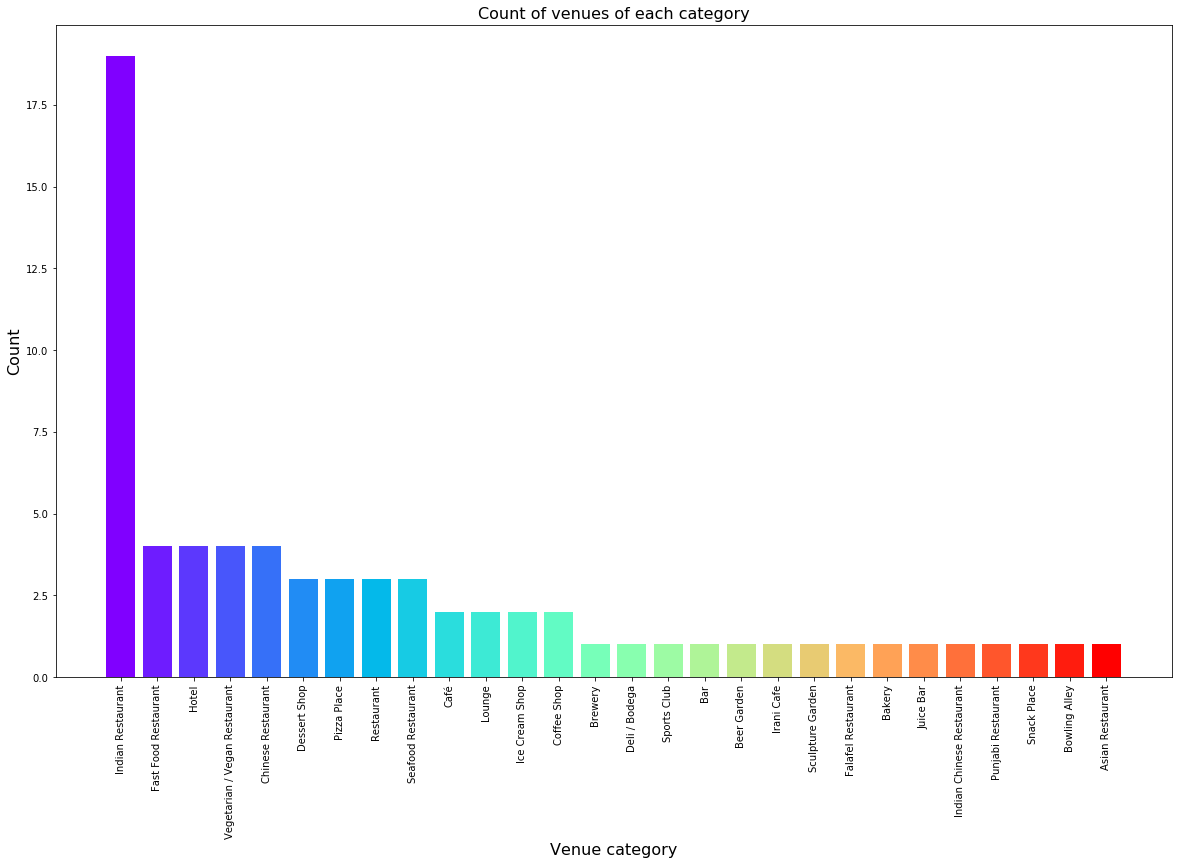

In [83]:
venue_distribution = selected_venues['categories'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

### based on ratings

Text(0.5, 1.0, 'Count of venues with given rating')

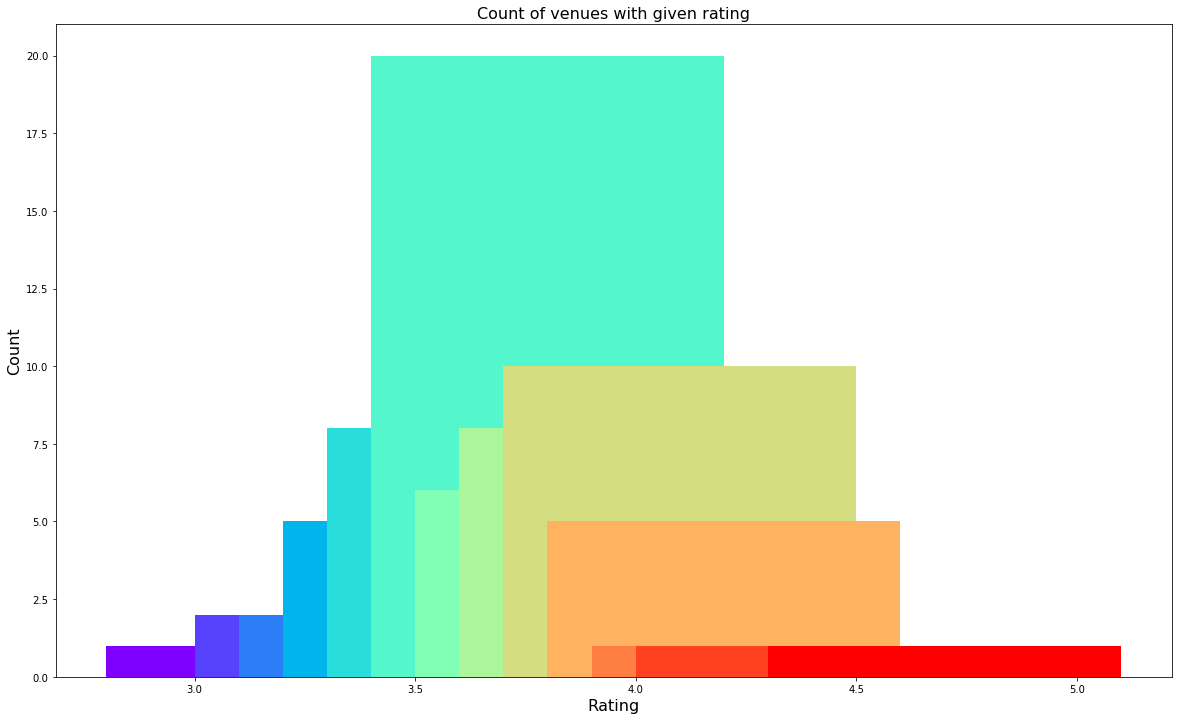

In [84]:
selected_venues['rating'] = selected_venues['rating'].astype(float)
rating = selected_venues['rating'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.bar(rating.index, rating.values, color = cm.rainbow(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues with given rating", fontsize = 16)

##### From the plot above, it is clear that majority venues have their rating close to 4.
##### Let's create bins for various ratings and plot them in different colors on the map. The ratings will be divided between 4 bins:
3 to 3.5  
3.5 to 4  
4 to 4.5  
4.5 to 5 

In [88]:
bins = [3.0, 3.5, 4.0, 4.5, 5.0]
labels = ['Low', 'Okay', 'Good', 'Very good']
selected_venues['rating_bin'] = pd.cut(selected_venues['rating'].astype(float), bins = bins, labels = labels, include_lowest = True)

In [89]:
color_map = {'Low': 'red', 'Okay': 'orange', 'Good': 'green', 'Very good': 'darkgreen'}

Mumbai_map = folium.Map(location = [CHD_LATITUDE, CHD_LONGITUDE], zoom_start = 13)

for name, address, latitude, longitude, rating_bin in zip(selected_venues['venue'], 
                                                          selected_venues['address'], 
                                                          selected_venues['latitude'], 
                                                          selected_venues['longitude'], 
                                                          selected_venues['rating_bin']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating_bin]),
        popup = label).add_to(Mumbai_map)  


Mumbai_map

## Price

We will now take a look the venues based on the price values. We have two price features for our venues, one is average_price which defines the average cost for one person and the other is price_range which determines the price range as defined by Zomato.  
We will first explore the average_price using a scatter plot between the price and the count of venues with that average price. We'll size the points based on the price to highlight their price.

Text(0.5, 1.0, 'Count of venues with given average price')

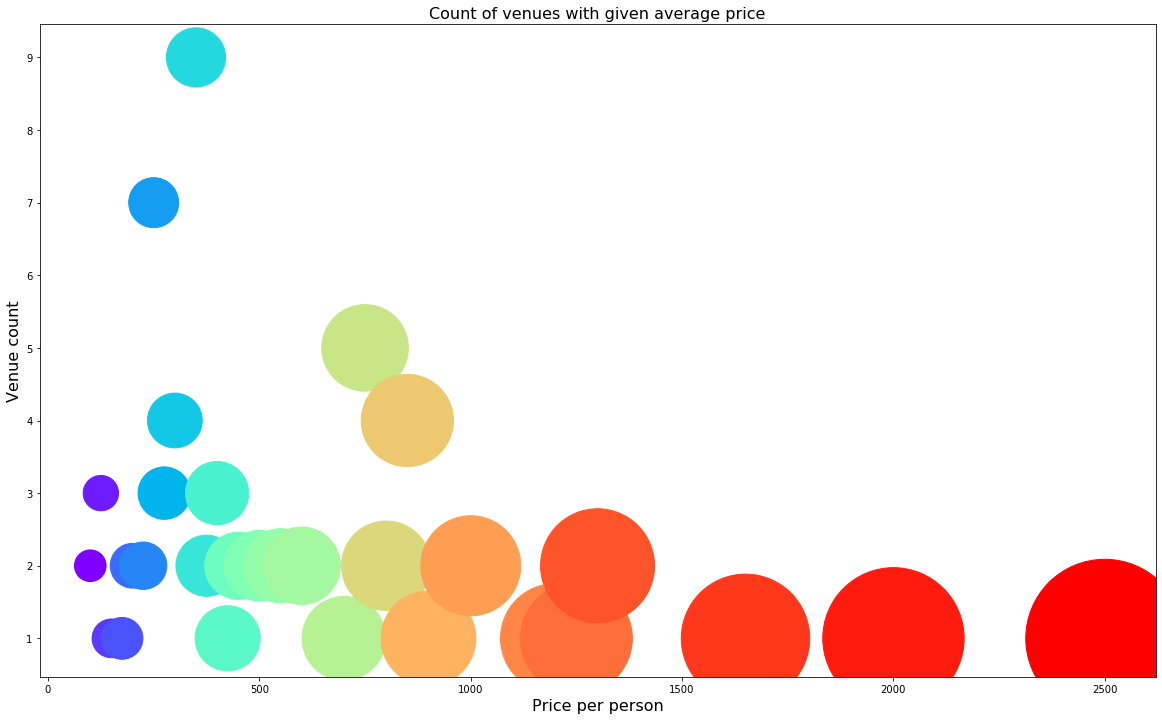

In [90]:
average_prices = selected_venues['average_price'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.scatter(average_prices.index, 
            average_prices.values, 
            s = average_prices.index*10, 
            c = cm.rainbow(np.linspace(0, 1, len(average_prices.index))))
plt.xlabel("Price per person", fontsize = 16)
plt.ylabel("Venue count", fontsize = 16)
plt.title("Count of venues with given average price", fontsize = 16)

we can see thier are more affordabe hotels in this area and less expensive one

# clustering
We will now cluster all these venues based on their price range, location and more to identify similar venues and the relationship amongst them. We'll cluster the venues into two separate groups.


In [109]:
from sklearn.cluster import KMeans

NO_OF_CLUSTERS = 3

clustering = selected_venues.drop(['venue', 'address', 'rating_bin', 'categories'], 1)
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)
selected_venues.insert(0, 'cluster_labels', kMeans.labels_)
selected_venues.head(11)

,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,2,Hotel,Tuskers - Sofitel,19.0673,72.8692,4.0,4.0,"Sofitel Hotel, C 57, Bandra Kurla Complex, Mumbai",1650.0,Okay
1,2,Hotel,O22 - Trident,19.0672,72.8675,4.0,4.0,"Trident Hotel, C 56, G Block, Bandra Kurla Com...",2000.0,Okay
2,2,Indian Restaurant,Masala Library,19.0690,72.8696,4.0,4.4,"Ground Floor, First International Financial Ce...",2500.0,Good
3,0,Ice Cream Shop,Natural Ice Cream,19.0776,72.8628,1.0,4.1,"3, Gokul Harmony, Kalina Market, Sunder Nagar,...",150.0,Good
4,1,Deli / Bodega,Smoke House Deli,19.0688,72.8695,4.0,4.3,"3A, Ground Floor, 1st International Financial ...",1250.0,Good
5,0,Dessert Shop,Theobroma,19.0637,72.8621,2.0,4.2,"The Capital, Ground Floor, Bandra Kurla Comple...",450.0,Good
6,0,Indian Restaurant,Delhi Zaika,19.0770,72.8784,2.0,3.8,"5/6, Near Kamran Kalpana Theater, LBS Marg, Ku...",350.0,Okay
7,1,Irani Cafe,SodaBottleOpenerWala,19.0638,72.8620,3.0,4.1,"Ground Floor, The Capital Building, G Block, B...",750.0,Good
8,0,Coffee Shop,Starbucks Coffee,19.0865,72.8898,2.0,4.1,"First Floor, Phoenix Market City, LBS Marg, Ku...",350.0,Good
9,0,Indian Restaurant,Naaz Hotel,19.0846,72.8893,2.0,4.1,"Kantharia Mahal, LBS Road, Opposite Phoenix Ma...",350.0,Good


In [114]:
chandigarh_map = folium.Map(location = [CHD_LATITUDE, CHD_LONGITUDE], zoom_start = 13)
color_map = { 0: 'blue', 1: 'red',2:'darkgreen'}

# add venues to the map
markers_colors = []
for venue, address, cluster, latitude, longitude in zip(selected_venues['venue'], 
                                                        selected_venues['address'], 
                                                        selected_venues['cluster_labels'], 
                                                        selected_venues['latitude'], 
                                                        selected_venues['longitude']):
    label = folium.Popup(str(venue) + ', ' + str(address), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = color_map[cluster],
        fill = True,
        fill_color = color_map[cluster],
        fill_opacity = 0.7).add_to(chandigarh_map)

# add cluster centers to the map
for index, cluster in enumerate(kMeans.cluster_centers_):
    latitude = cluster[0]
    longitude = cluster[1]
    label = folium.Popup("Cluster: " + str(index), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 10,
        popup = label,
        color = color_map[index],
        fill = True,
        fill_color = color_map[index],
        fill_opacity = 0.7).add_to(chandigarh_map)


chandigarh_map

From the map, we see the three clusters:  
The first cluster have all the expensive restaurant  
The second cluster is spread across the whole city and includes the majority venues.  
The third cluster is very cheap restaurant spread and has very limited venues.  
I'll also check the venues of the 3 clusters

In [131]:
result = selected_venues[selected_venues['cluster_labels'] == 0]
print("Cluster 0")
result.head(10).reset_index(drop = True)

Cluster 0


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,0,Ice Cream Shop,Natural Ice Cream,19.0776,72.8628,1.0,4.1,"3, Gokul Harmony, Kalina Market, Sunder Nagar,...",150.0,Good
1,0,Dessert Shop,Theobroma,19.0637,72.8621,2.0,4.2,"The Capital, Ground Floor, Bandra Kurla Comple...",450.0,Good
2,0,Indian Restaurant,Delhi Zaika,19.0770,72.8784,2.0,3.8,"5/6, Near Kamran Kalpana Theater, LBS Marg, Ku...",350.0,Okay
3,0,Coffee Shop,Starbucks Coffee,19.0865,72.8898,2.0,4.1,"First Floor, Phoenix Market City, LBS Marg, Ku...",350.0,Good
4,0,Indian Restaurant,Naaz Hotel,19.0846,72.8893,2.0,4.1,"Kantharia Mahal, LBS Road, Opposite Phoenix Ma...",350.0,Good
5,0,Chinese Restaurant,Hotel Darshan,19.0828,72.8851,1.0,3.5,"Opposite Kohinoor City Gate, Kurla West, Near ...",125.0,Low
6,0,Snack Place,Oven Hot The Bake Shop,19.0569,72.8981,1.0,3.7,"4 & 5, Ganesh Kutir Building, Near Laxmi Store...",100.0,Okay
7,0,Indian Restaurant,Sadguru Veg Diet,19.0622,72.9005,2.0,3.8,"Janata Market, Near Chembur Station, Chembur, ...",350.0,Okay
8,0,Dessert Shop,Chocday,19.0752,72.9049,1.0,3.7,"Unit 15, Vikrant Building, Vikrant Circle, Gha...",175.0,Okay
9,0,Asian Restaurant,Orchids,19.0616,72.9016,3.0,4.0,"Hotel Royal Orchid, NG Acharya Marg, Chembur, ...",600.0,Okay


In [132]:
print("These venues for cluster 0 have mean price range of {:.02f} and rating spread around {:.02f} and avg price is{:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean(),result['average_price'].astype(float).mean()))

These venues for cluster 0 have mean price range of 1.90 and rating spread around 3.81 and avg price is317.71


In [126]:
result = selected_venues[selected_venues['cluster_labels'] == 1]
print("Cluster 1")
result.head(10).reset_index(drop = True)

Cluster 1


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,1,Deli / Bodega,Smoke House Deli,19.0688,72.8695,4.0,4.3,"3A, Ground Floor, 1st International Financial ...",1250.0,Good
1,1,Irani Cafe,SodaBottleOpenerWala,19.0638,72.8620,3.0,4.1,"Ground Floor, The Capital Building, G Block, B...",750.0,Good
2,1,Restaurant,Ivy Restaurant and Banquets,19.0696,72.9004,3.0,4.1,"Above Shopper's Stop, Amar Mahal, Chembur, Mumbai",800.0,Good
3,1,Lounge,Flaming 5 Fine Dine & Lounge,19.0690,72.9004,3.0,3.6,"Level 5, The Destination, Near Shopper's Stop,...",700.0,Okay
4,1,Brewery,British Brewing Company,19.1077,72.8834,4.0,4.0,"Ground Floor, Times Square Tech Park, Andheri ...",1000.0,Okay
5,1,Café,Le Café,19.0617,72.8997,3.0,4.2,"1st Road, Opposite B.M.C Office, Chembur, Mumbai",750.0,Good
6,1,Restaurant,BAR BAR,19.0865,72.8893,3.0,3.8,"1st Floor, Phoenix Marketcity, Lal Bahadur Sha...",750.0,Okay
7,1,Vegetarian / Vegan Restaurant,Curry Twist,19.1032,72.8863,3.0,3.9,"Sagar Pallazio, Andheri Kurla Road, Opposite C...",800.0,Okay
8,1,Lounge,Wild Orchids,19.0616,72.9016,4.0,3.8,"Hotel Royal Orchid, NG Acharya Marg, Chembur, ...",1000.0,Okay
9,1,Beer Garden,The Beer Cafe,19.0999,72.8751,4.0,4.0,"MLCP P10, Landside, Departure Terminal 2, Inte...",1200.0,Okay


In [127]:
print("These venues for cluster 1 have mean price range of {:.02f} and rating spread around {:.02f} and avg price is{:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean(),result['average_price'].astype(float).mean()))

These venues for cluster 1 have mean price range of 3.32 and rating spread around 4.00 and avg price is915.79


In [128]:
result = selected_venues[selected_venues['cluster_labels'] == 2]
print("Cluster 1")
result.head(10).reset_index(drop = True)

Cluster 1


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,2,Hotel,Tuskers - Sofitel,19.0673,72.8692,4.0,4.0,"Sofitel Hotel, C 57, Bandra Kurla Complex, Mumbai",1650.0,Okay
1,2,Hotel,O22 - Trident,19.0672,72.8675,4.0,4.0,"Trident Hotel, C 56, G Block, Bandra Kurla Com...",2000.0,Okay
2,2,Indian Restaurant,Masala Library,19.0690,72.8696,4.0,4.4,"Ground Floor, First International Financial Ce...",2500.0,Good


In [129]:
print("These venues for cluster 2 have mean price range of {:.02f} and rating spread around {:.02f} and avg price is{:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean(),result['average_price'].astype(float).mean()))

These venues for cluster 2 have mean price range of 4.00 and rating spread around 4.13 and avg price is2050.00


### results and discussion

we see that it is you get very marginal rating increase after you reach meadium price range   
we see that cluster 0 gets low rating and they are cheap to dine.   
we see that if we are willing to pay extra we will get assurance that we will get good dining 

# Conclusion

The purpose of this project was to explore the places that a person visiting Mumbai could visit. The venues have been identified using Foursquare and Zomato API and have been plotted on the map.   
we conluded you will need arount 1000 rs to have a good dining in mumbai per person 